In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('E:\\lung-cancer.csv',header=None)
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,1,1,1,3,2,2,1,2,2,0,2,2,2,2,1,2,2,2,3,2,1,1,1,3,3,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,1,1,1,1,3,3,1,2,2,0,0,2,2,2,1,2,1,3,2,3,1,1,1,3,3,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,1,1,0,3,3,3,1,2,1,0,0,2,2,2,1,2,2,3,2,3,1,3,3,3,1,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,2,1,0,3,3,1,1,2,2,0,0,2,2,2,2,1,3,2,3,3,1,3,3,3,1,1,1,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,2,2,1,1,2,2,2,2,2,0,0,2,2,2,1,1,2,3,2,2,1,1,1,3,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2


In [7]:
df[0].value_counts()

2    13
3    10
1     9
Name: 0, dtype: int64

# Feature Engineering

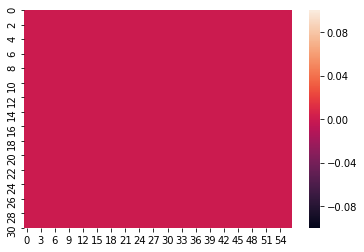

In [5]:
sns.heatmap(df.isnull())#no missing value in the dataset.
#But there are '?' signs which are actually missing values which are not detected as missing values by the system.

# Relacing the '?' sign with NAN

In [85]:
for i in df.columns:
    df[i]=df[i].replace('?',np.nan)

In [88]:
df.dtypes

0      int64
1      int64
2      int64
3      int64
4     object
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19     int64
20     int64
21     int64
22     int64
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
30     int64
31     int64
32     int64
33     int64
34     int64
35     int64
36     int64
37     int64
38    object
39     int64
40     int64
41     int64
42     int64
43     int64
44     int64
45     int64
46     int64
47     int64
48     int64
49     int64
50     int64
51     int64
52     int64
53     int64
54     int64
55     int64
56     int64
dtype: object

# Imputing with mode as the feature is in object format

In [86]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [87]:
df.shape

(32, 57)

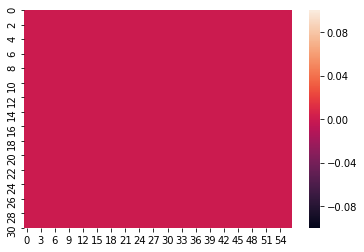

In [89]:
sns.heatmap(df.isnull())   #no missing value in dataset

In [90]:
df.isnull().sum()#no missing value in dataset

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
dtype: int64

In [91]:
df.describe()

,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,1.500000,0.906250,1.937500,2.187500,2.218750,1.312500,1.875000,1.875000,0.468750,1.093750,1.750000,1.812500,1.750000,1.343750,1.718750,1.937500,2.312500,2.062500,2.156250,1.437500,2.312500,2.312500,2.718750,1.718750,1.625000,1.687500,1.687500,1.968750,2.000000,1.593750,1.750000,2.062500,1.875000,1.968750,1.937500,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,0.672022,0.856074,0.800705,0.737804,0.750672,0.535061,0.336011,0.336011,0.841825,0.962503,0.439941,0.396558,0.439941,0.653002,0.581121,0.800705,0.470929,0.564401,0.677251,0.715609,0.895779,0.895779,0.634206,0.728869,0.707107,0.535061,0.692704,0.474129,0.439941,0.614837,0.622171,0.353553,0.491869,0.400353,0.435335,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.750000,2.000000,1.750000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.500000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,1.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0.250000,2.000000,2.000000,2.000000,2.000000,1.250000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,

# changing datatype 

In [92]:
df[4] = df[4].astype(float)
df[38] = df[38].astype(float)

In [93]:
df.dtypes

0       int64
1       int64
2       int64
3       int64
4     float64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
26      int64
27      int64
28      int64
29      int64
30      int64
31      int64
32      int64
33      int64
34      int64
35      int64
36      int64
37      int64
38    float64
39      int64
40      int64
41      int64
42      int64
43      int64
44      int64
45      int64
46      int64
47      int64
48      int64
49      int64
50      int64
51      int64
52      int64
53      int64
54      int64
55      int64
56      int64
dtype: object

# EDA

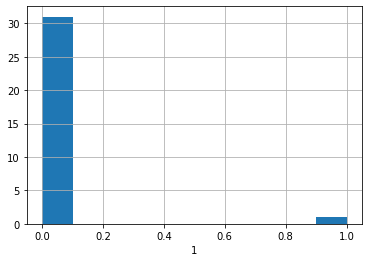

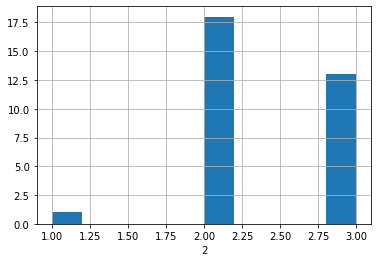

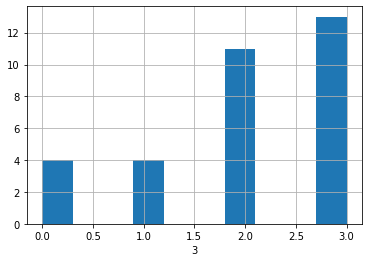

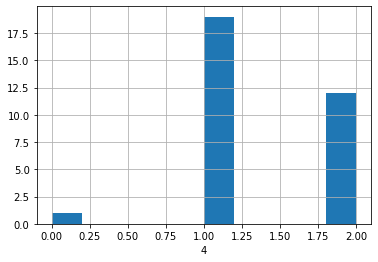

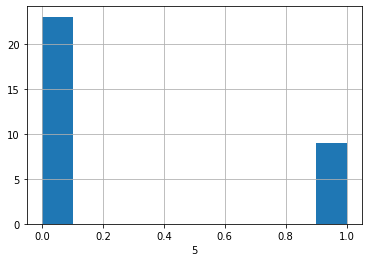

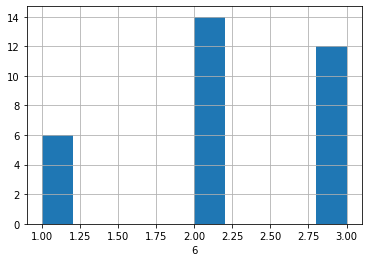

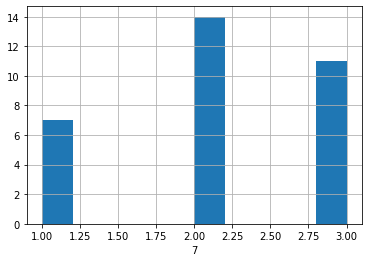

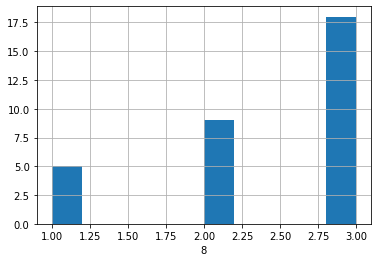

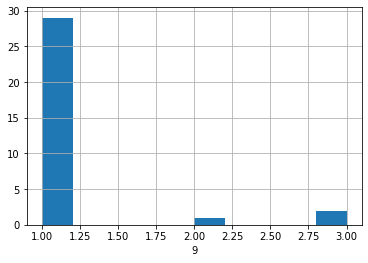

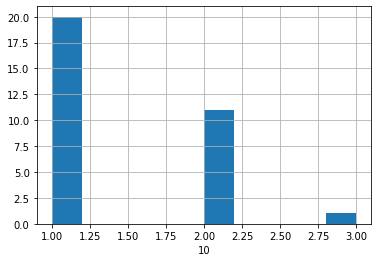

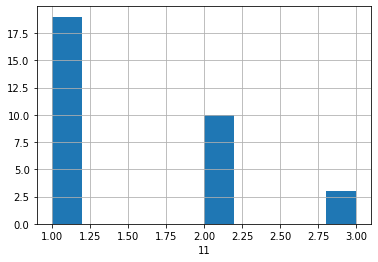

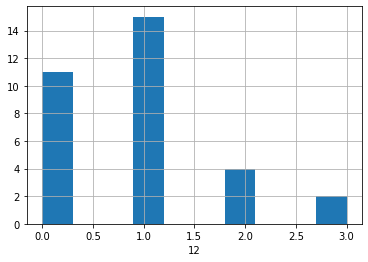

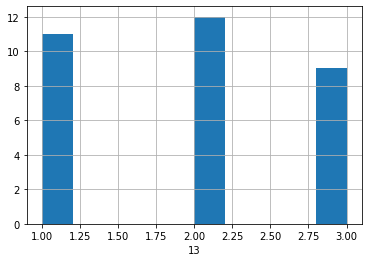

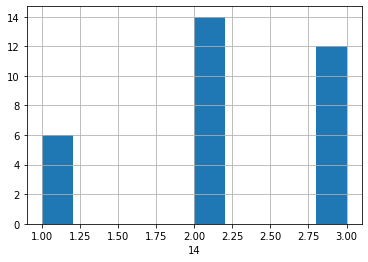

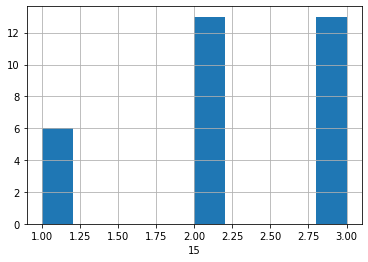

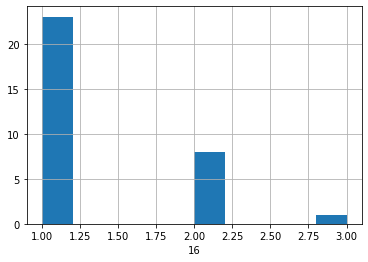

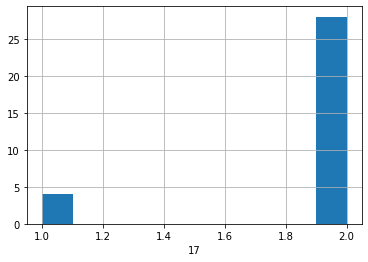

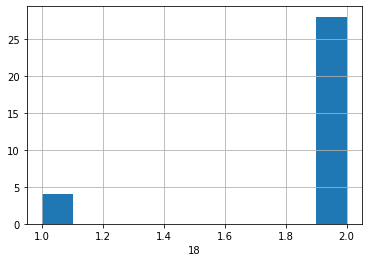

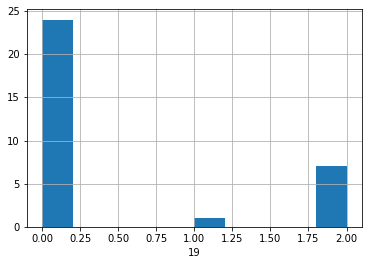

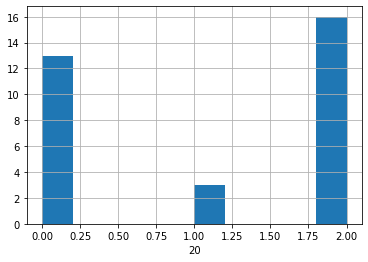

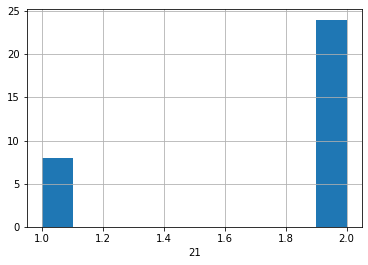

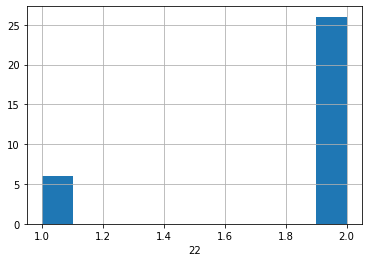

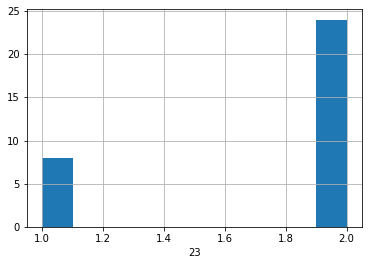

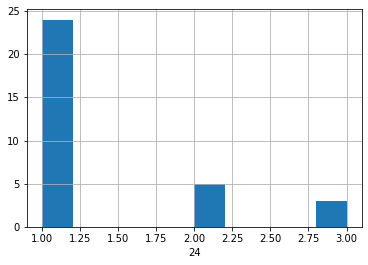

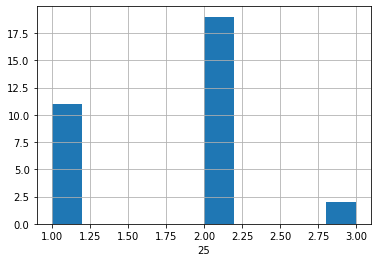

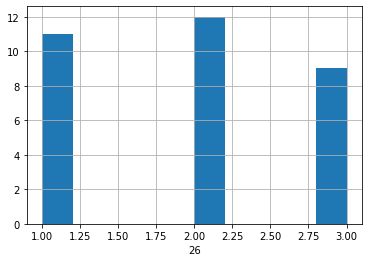

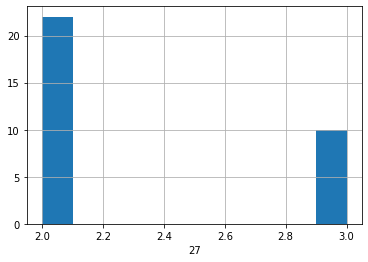

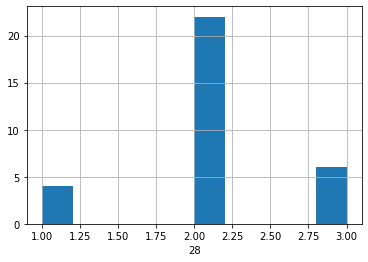

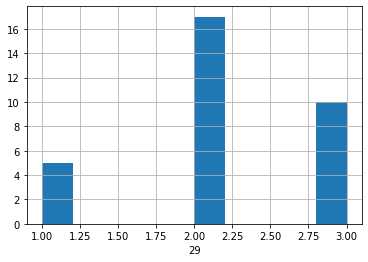

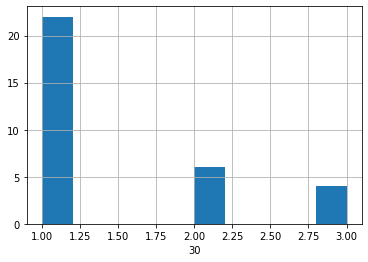

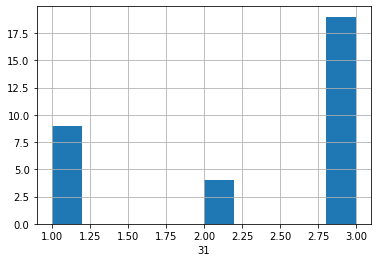

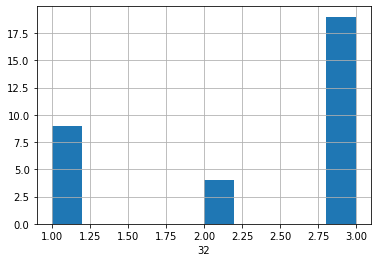

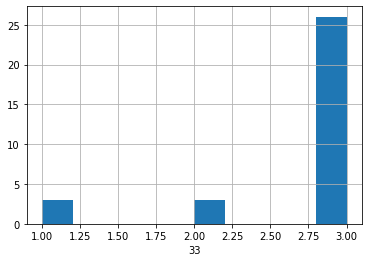

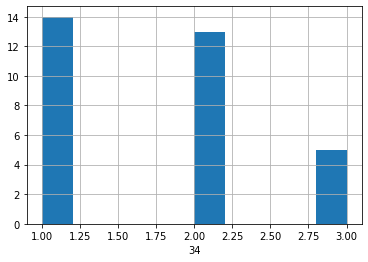

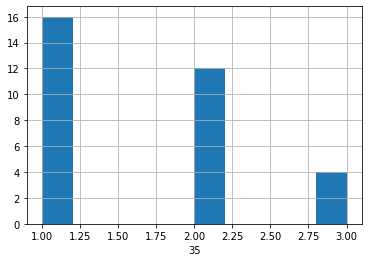

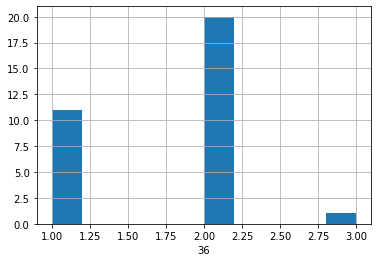

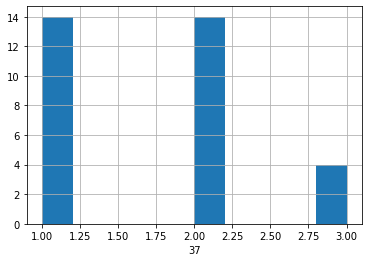

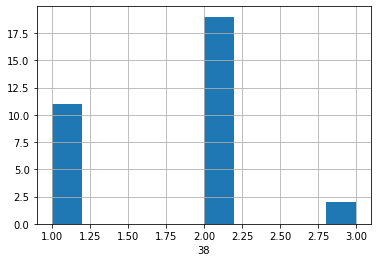

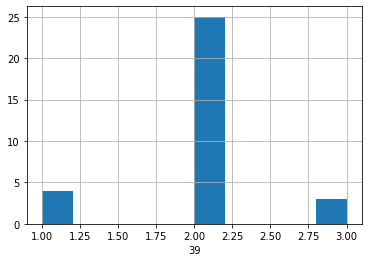

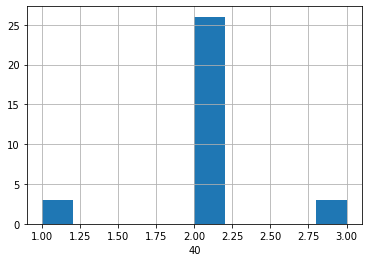

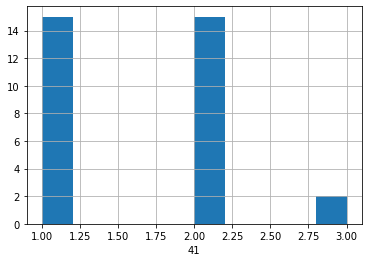

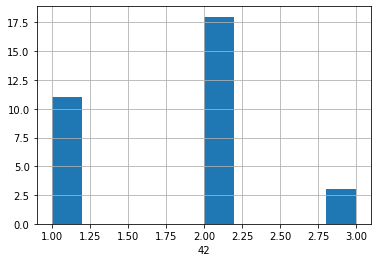

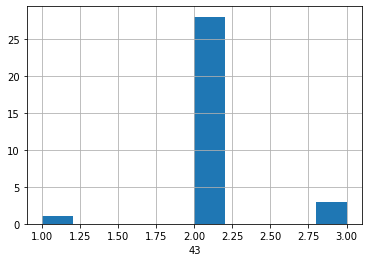

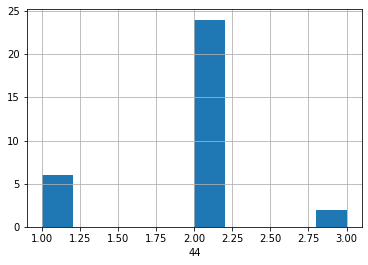

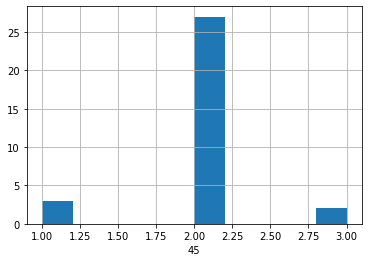

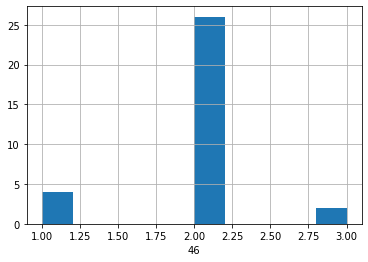

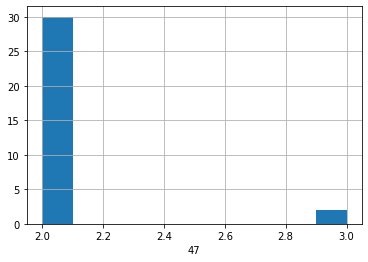

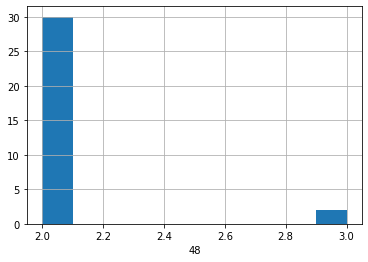

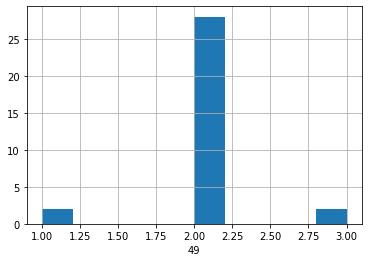

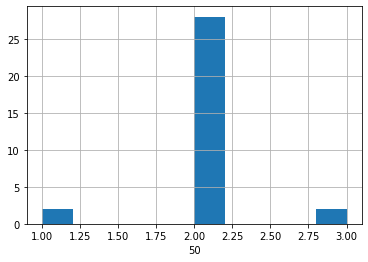

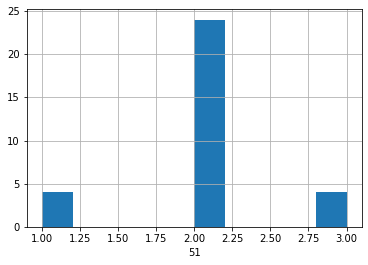

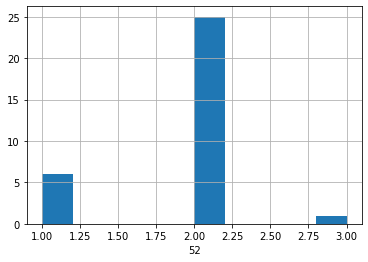

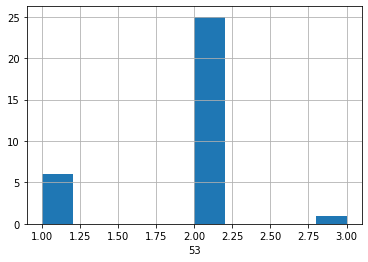

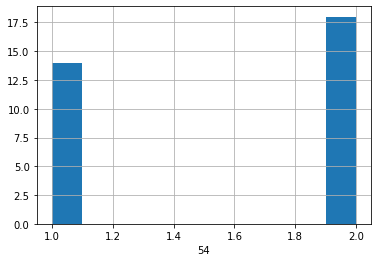

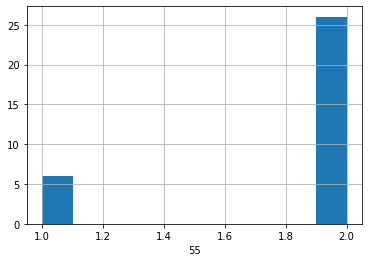

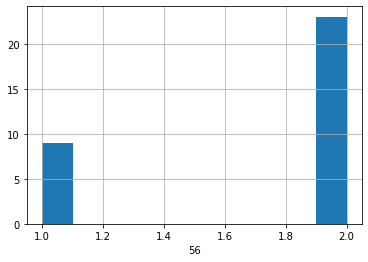

In [94]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        
        df[feature].hist()
        plt.xlabel(feature)
        plt.show()

In [51]:
#checking relation of each attribute w.r.t target attribute

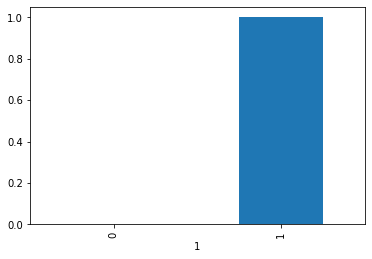

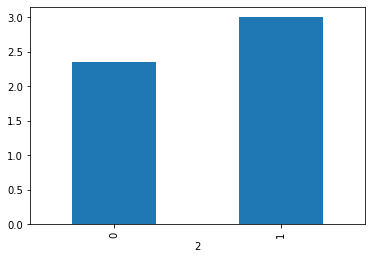

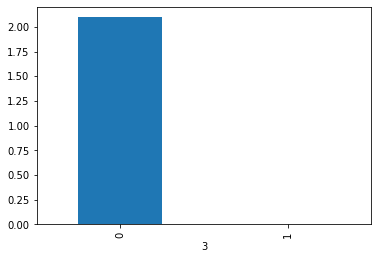

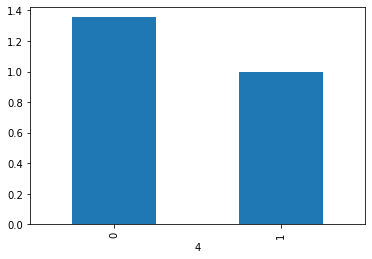

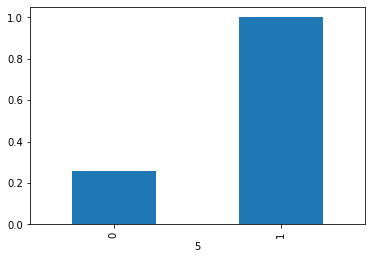

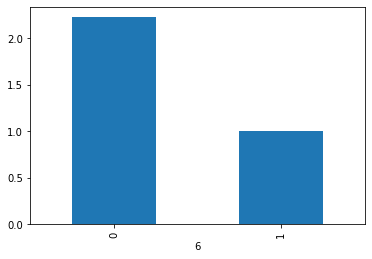

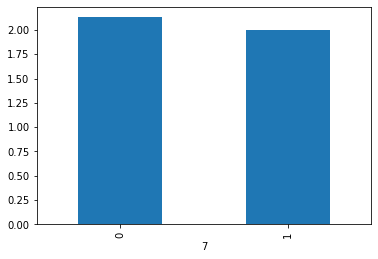

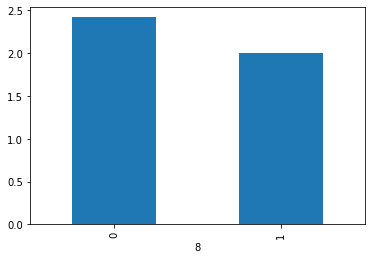

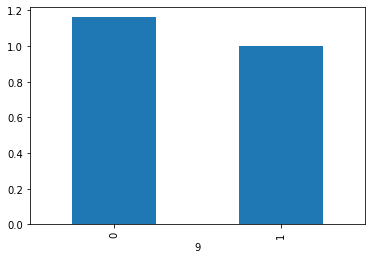

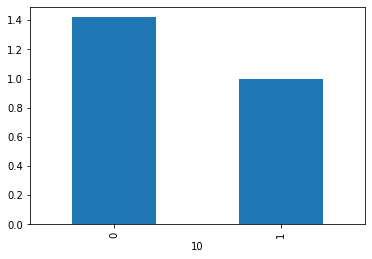

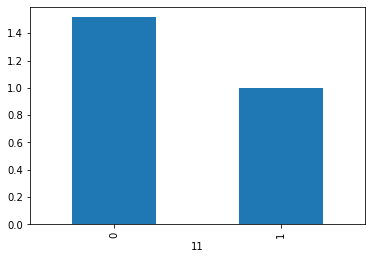

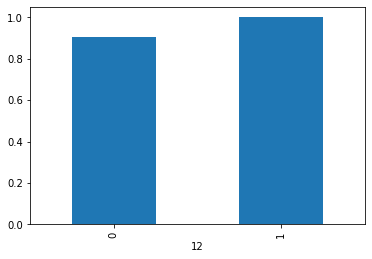

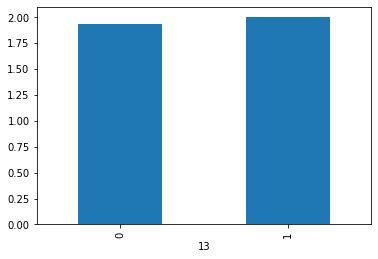

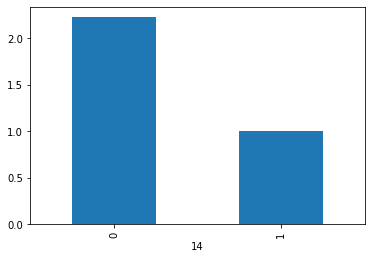

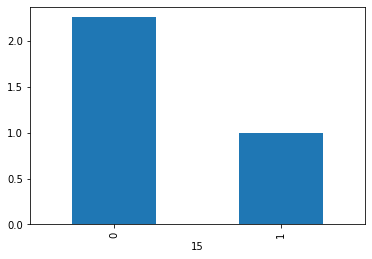

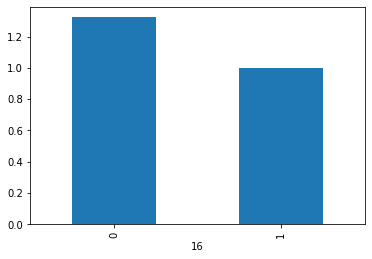

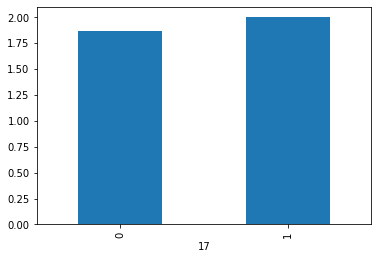

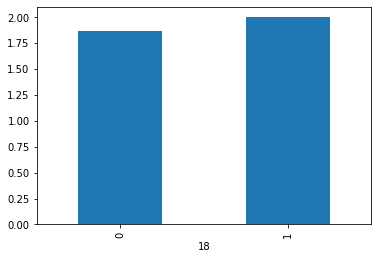

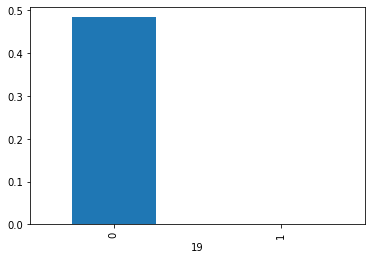

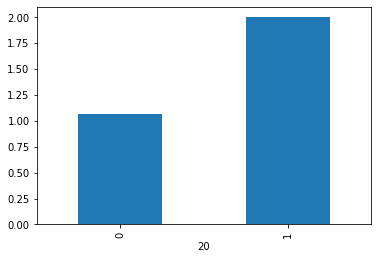

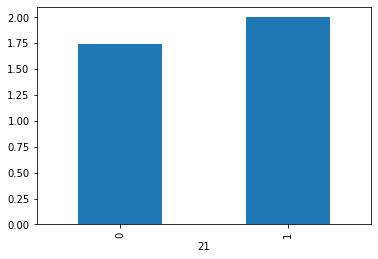

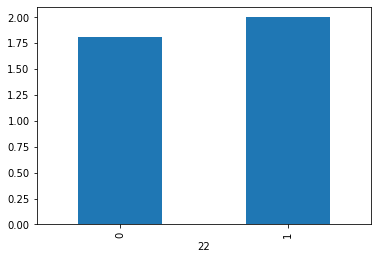

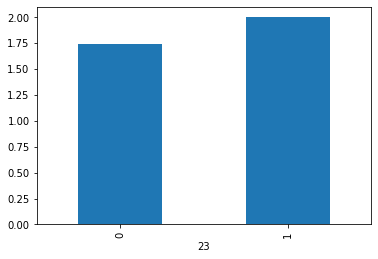

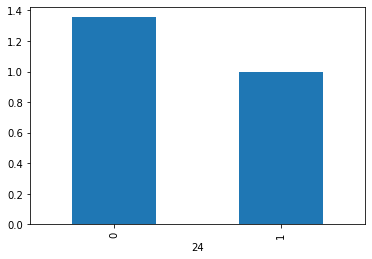

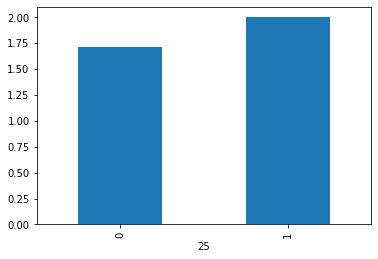

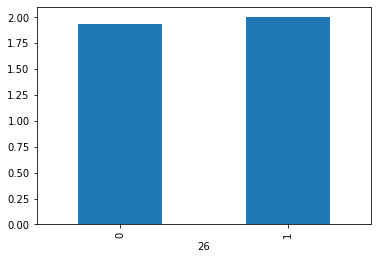

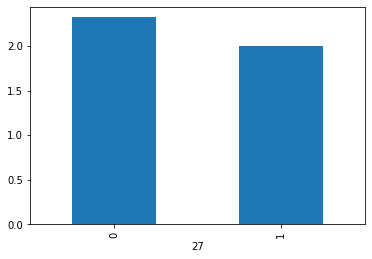

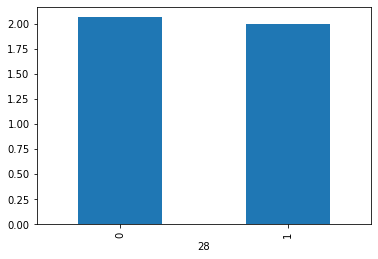

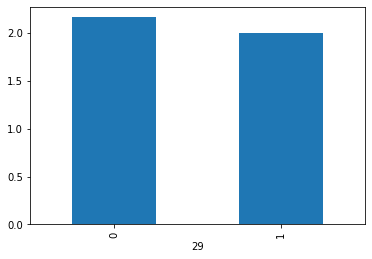

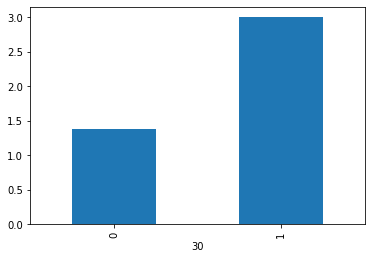

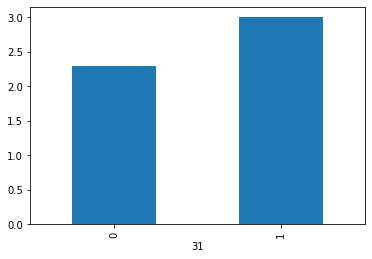

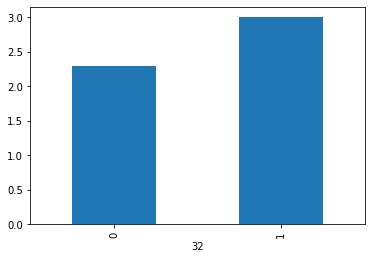

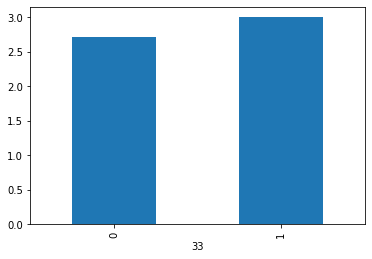

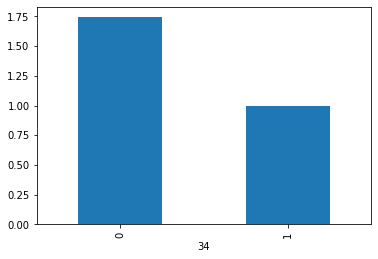

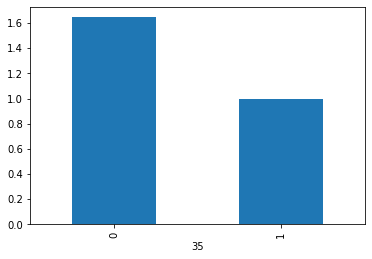

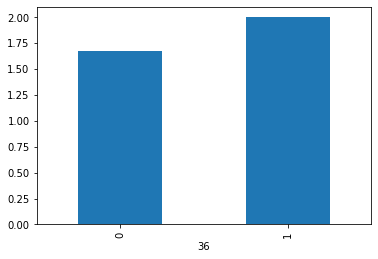

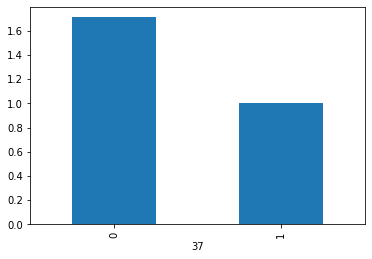

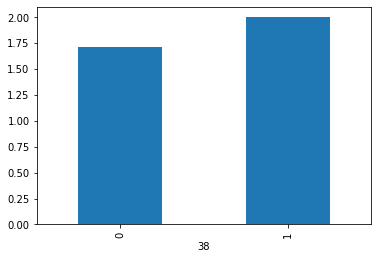

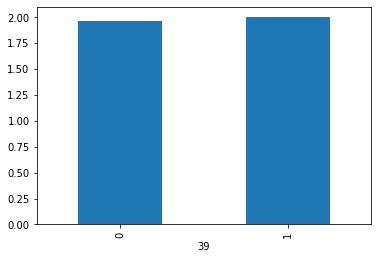

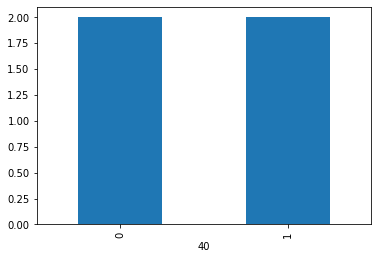

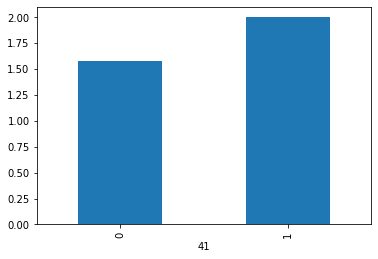

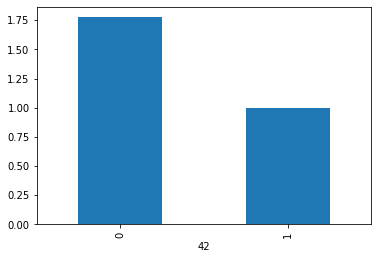

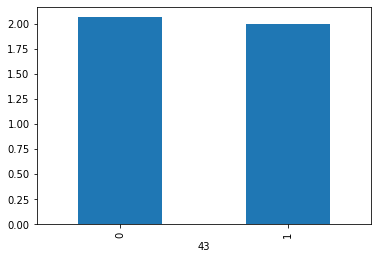

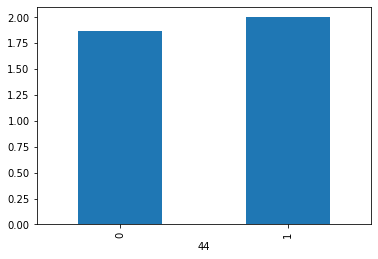

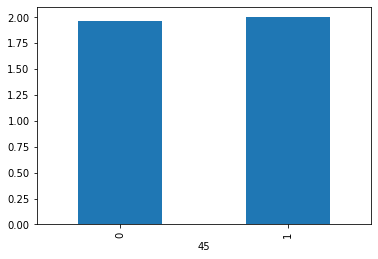

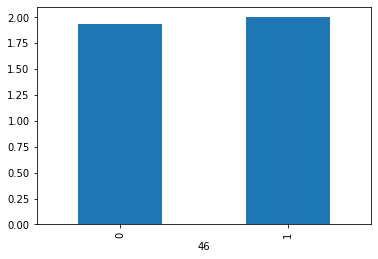

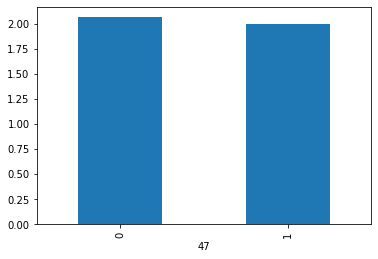

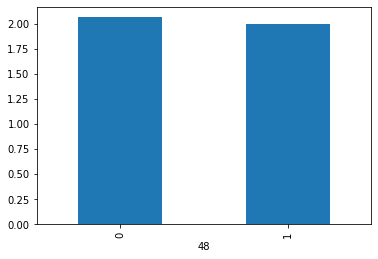

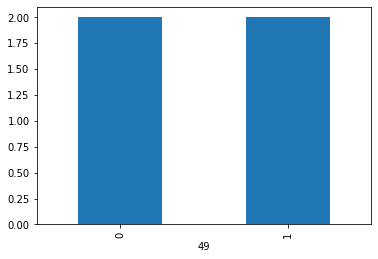

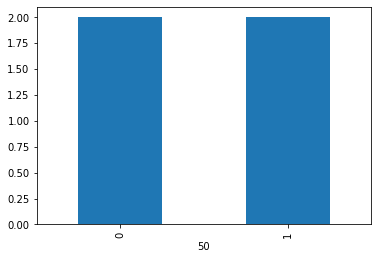

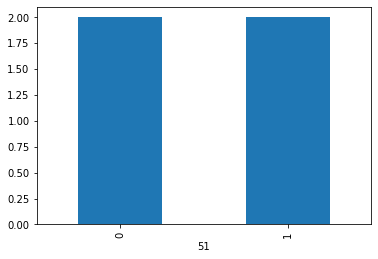

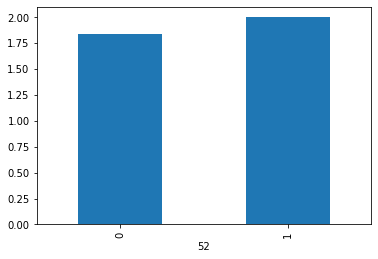

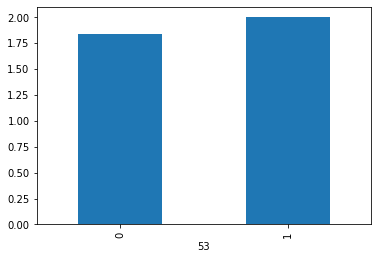

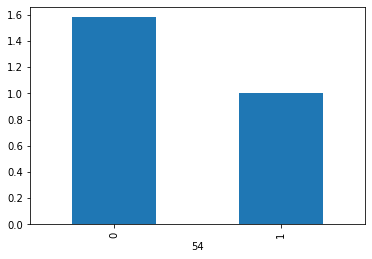

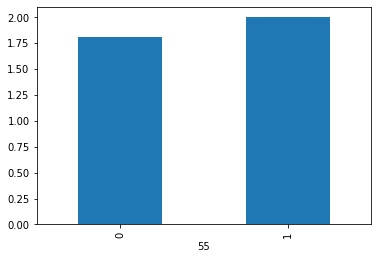

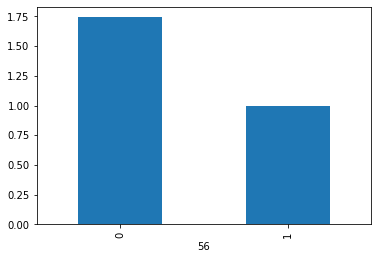

In [95]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        df.groupby(1)[feature].mean().plot.bar()
        plt.xlabel(feature)
        plt.show()


In [96]:
df[0].value_counts()

2    13
3    10
1     9
Name: 0, dtype: int64

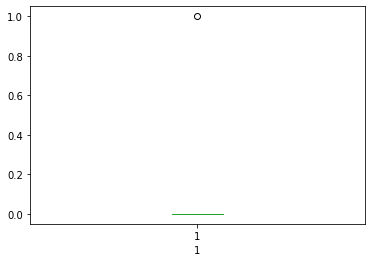

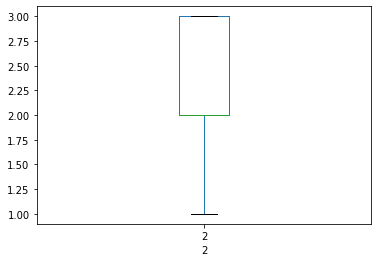

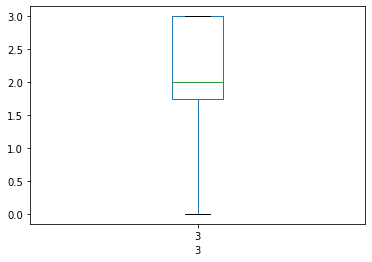

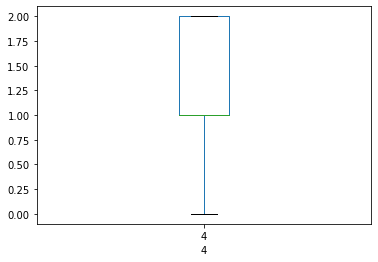

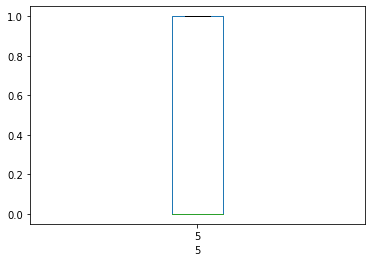

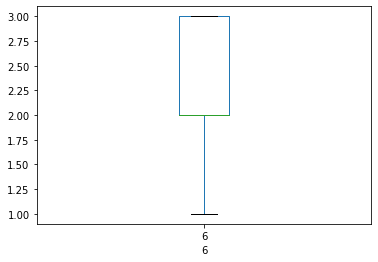

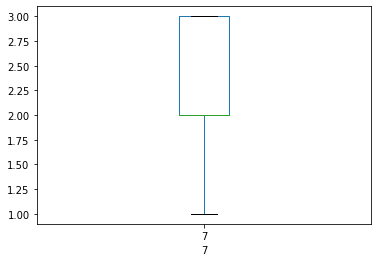

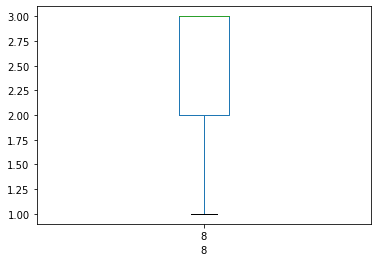

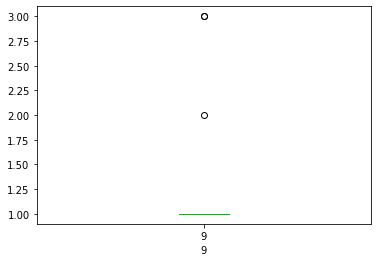

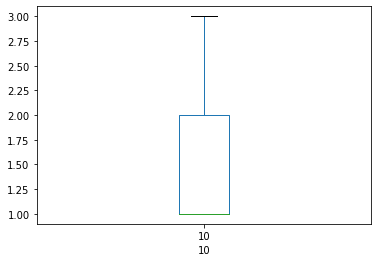

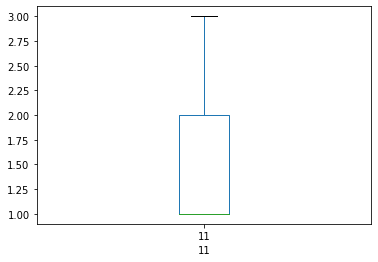

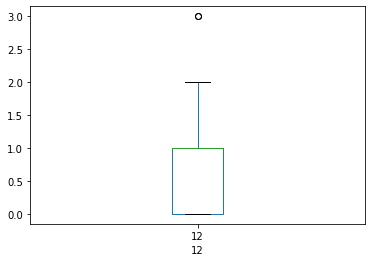

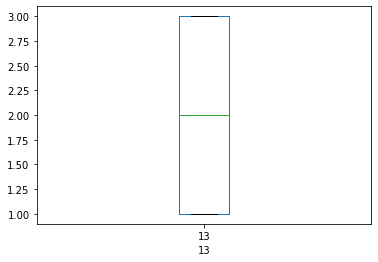

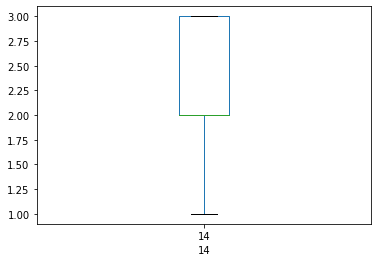

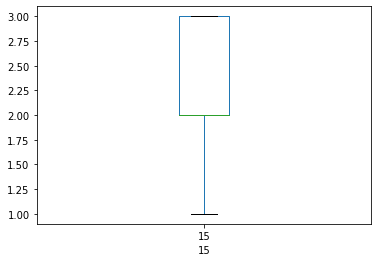

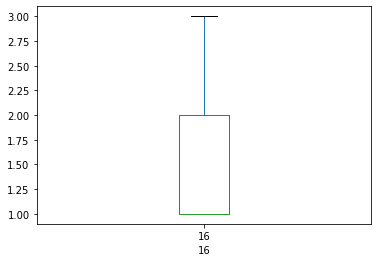

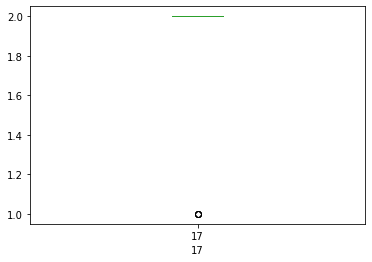

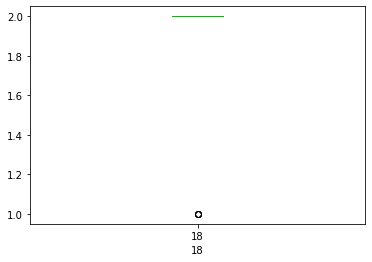

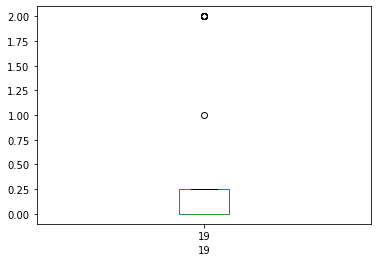

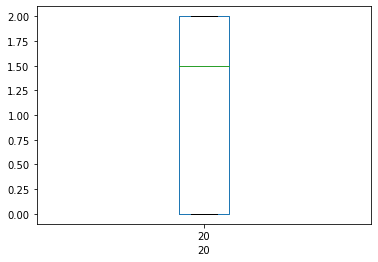

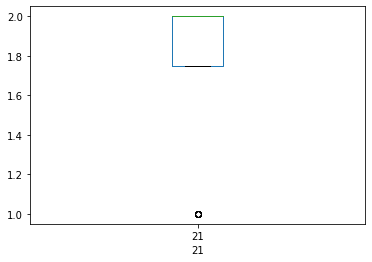

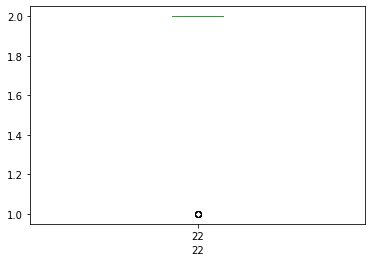

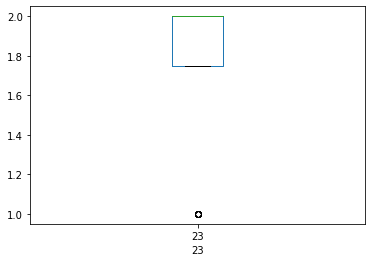

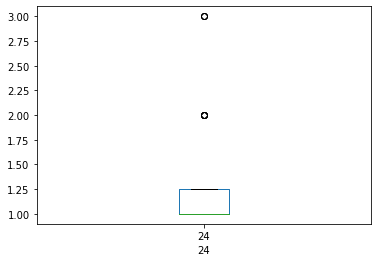

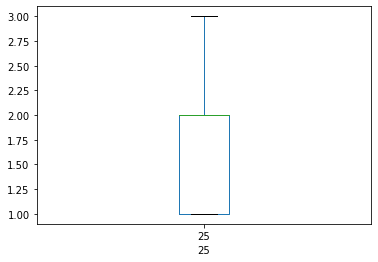

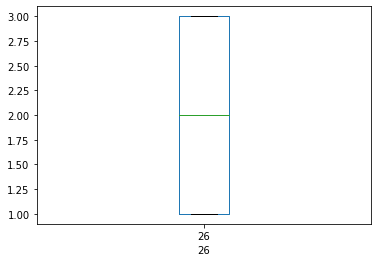

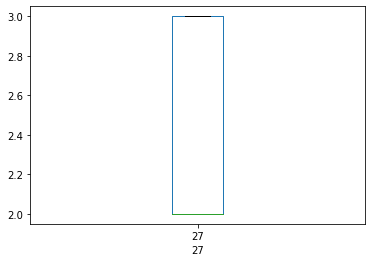

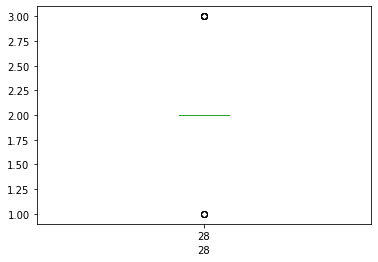

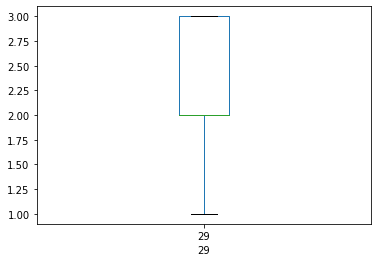

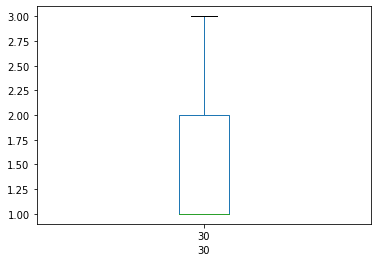

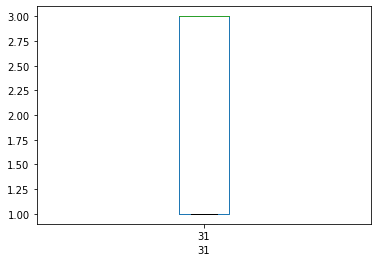

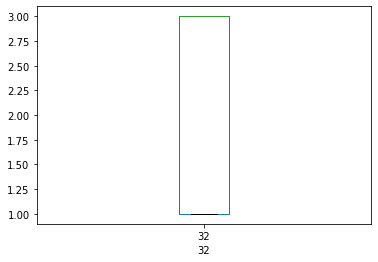

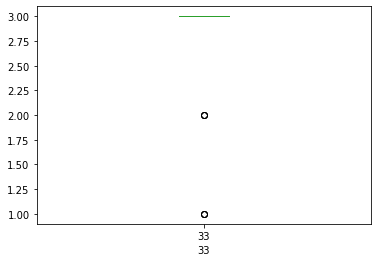

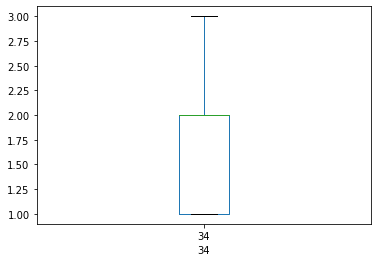

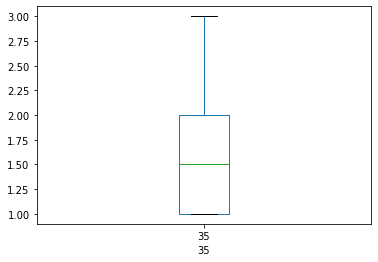

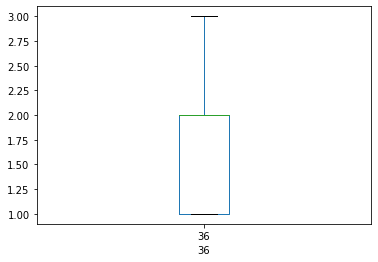

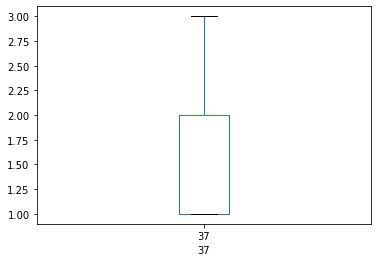

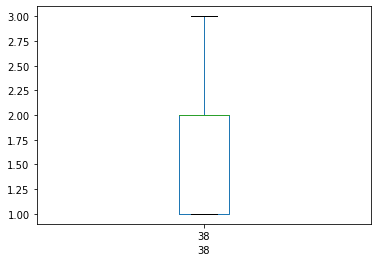

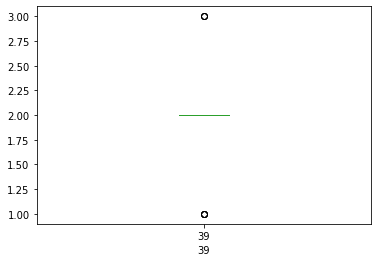

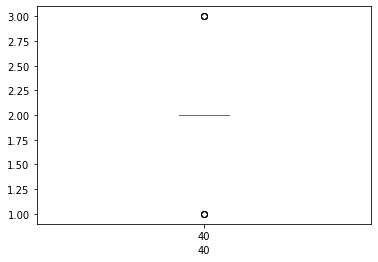

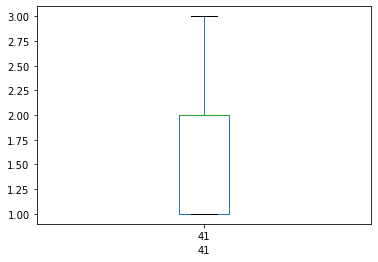

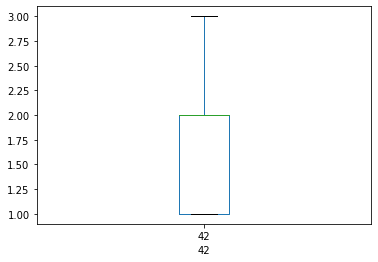

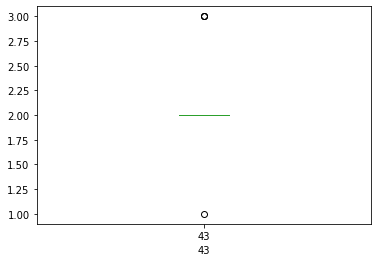

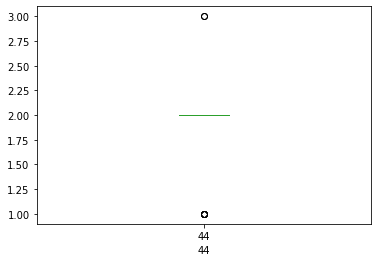

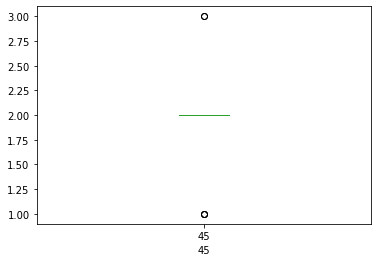

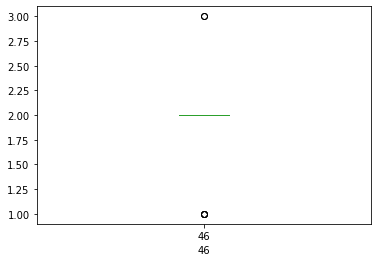

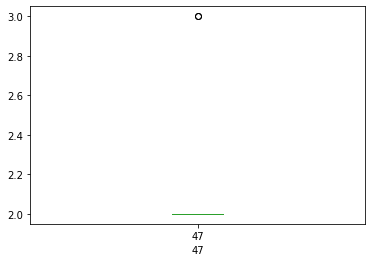

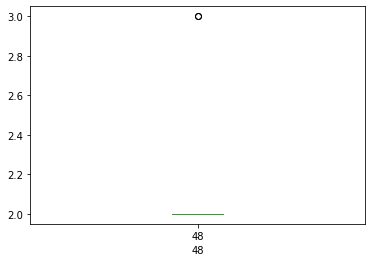

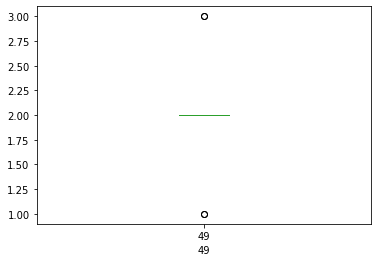

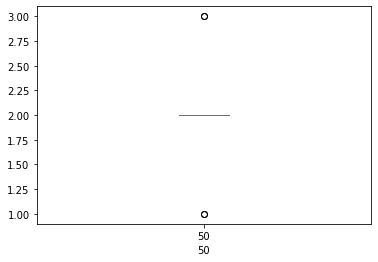

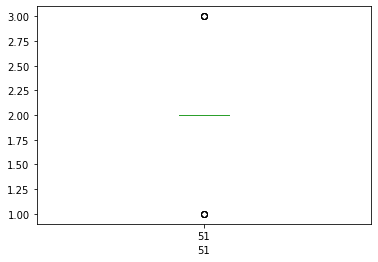

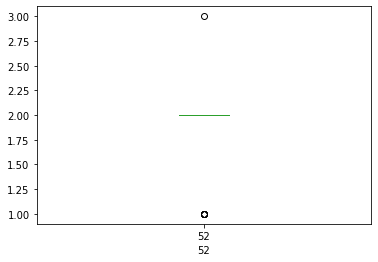

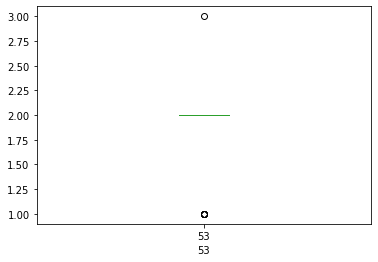

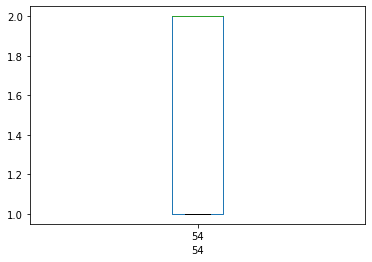

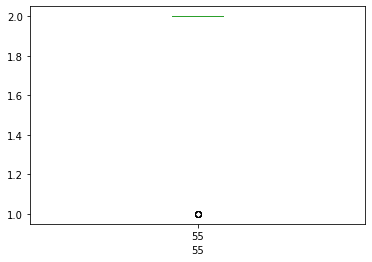

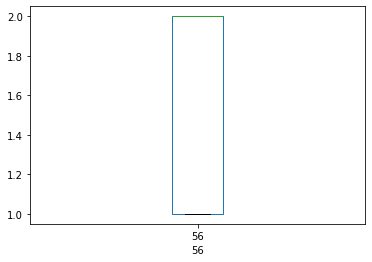

In [97]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        df[feature].plot.box()
        plt.xlabel(feature)
        plt.show()

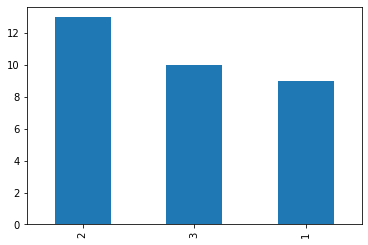

In [98]:
#checking if imbalanced dataset
df[0].value_counts().plot.bar()

# Separating target and independent variables

In [99]:
y=df[0]
X=df.drop([0],axis=1)

# Applying Power transformation to remove skewness

In [100]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [101]:
df.skew()

1     5.656854
2    -0.049529
3    -0.408285
4    -0.027869
5     1.021592
6    -0.160573
7    -0.136092
8    -0.482865
9     2.926499
10    0.557056
11    0.461892
12    0.005104
13   -0.048188
14   -0.160573
15   -0.198086
16    1.023345
17   -2.380876
18   -2.380876
19    1.214999
20   -0.225960
21   -1.212283
22   -1.681134
23   -1.212283
24    1.216028
25   -0.045661
26   -0.048188
27    0.849385
28    0.013003
29   -0.086578
30    0.867741
31   -0.556174
32   -0.556174
33   -1.685267
34    0.084395
35    0.197875
36   -0.074588
37    0.075334
38   -0.045661
39    0.099132
40    0.130739
41    0.088824
42   -0.031567
43    0.056414
44    0.069793
45    0.221248
46    0.173305
47    0.000000
48    0.000000
49    0.243670
50    0.243670
51    0.058840
52    0.167426
53    0.167426
54   -0.264542
55   -1.681134
56   -1.021592
dtype: float64

In [102]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-0.179605,1.150166,-1.751531,-0.630077,-0.625543,-0.319152,-0.199686,-0.806143,-0.321634,-0.772982,-0.819826,0.332815,1.286736,-0.319152,-0.380113,-0.625391,0.377964,0.377964,-0.577126,0.947951,0.57735,0.480384,0.57735,-0.577056,0.517184,0.166631,-0.67420,1.683993,-0.264265,-0.6724,-1.421852,-1.421852,0.480138,1.518876,0.776017,0.581953,-1.079122,0.517184,0.04838,-0.009582,-1.033933,0.462520,-0.140814,0.220223,0.049950,0.107598,0.0,0.0,-0.011059,-0.011059,-0.006228,-1.765273,-1.765273,-1.133893,0.480384,0.625543
1,-0.179605,1.150166,1.046294,-0.630077,-0.625543,1.152922,-1.489988,0.852285,-0.321634,-0.772982,-0.819826,0.332815,-1.234563,1.152922,1.097026,-0.625391,0.377964,0.377964,-0.577126,-1.164272,0.57735,0.480384,0.57735,-0.577056,0.517184,-1.234563,1.48324,-0.110527,1.290582,-0.6724,-1.421852,-1.421852,0.480138,1.518876,0.776017,0.581953,0.620490,-1.277986,0.04838,-0.009582,0.792949,-1.266918,-0.140814,0.220223,-2.321361,0.107598,0.0,0.0,-0.011059,-0.011059,-0.006228,0.289778,0.289778,-1.133893,0.480384,0.625543
2,-0.179605,1.150166,1.046294,1.214323,-0.625543,1.152922,1.202320,0.852285,-0.321634,-0.772982,-0.819826,-1.247064,1.286736,1.152922,1.097026,-0.625391,0.377964,-2.645751,-0.577126,-1.164272,0.57735,0.480384,0.57735,-0.577056,0.517184,0.166631,1.48324,-0.110527,1.290582,-0.6724,0.803748,0.803748,0.480138,-1.075227,0.776017,0.581953,-1.079122,0.517184,0.04838,-0.009582,-1.033933,0.462520,-0.140814,-1.728068,0.049950,0.107598,0.0,0.0,-0.011059,-0.011059,-0.006228,0.289778,0.289778,0.881917,-2.081666,0.625543
3,-0.179605,-0.692739,1.046294,1.214323,1.598611,1.152922,1.202320,0.852285,-0.321634,1.256527,-0.819826,-1.247064,1.286736,1.152922,-1.553310,-0.625391,0.377964,0.377964,-0.577126,-1.164272,0.57735,0.480384,0.57735,1.681671,-1.277986,1.286736,-0.67420,1.683993,1.290582,-0.6724,0.803748,0.803748,0.480138,-1.075227,-0.971052,-1.294865,-1.079122,0.517184,0.04838,-0.009582,0.792949,-1.266918,-0.140814,0.220223,0.049950,-2.057760,0.0,0.0,-0.011059,-0.011059,-0.006228,0.289778,0.289778,0.881917,0.480384,0.625543
4,-0.179605,1.150166,-0.188808,-0.630077,1.598611,1.152922,1.202320,0.852285,3.107476,1.256527,1.083949,0.332815,-1.234563,-0.319152,-0.380113,1.583530,0.377964,0.377964,-0.577126,-1.164272,0.57735,0.480384,0.57735,-0.577056,-1.277986,0.166631,1.48324,-0.110527,-0.264265,-0.6724,-1.421852,-1.421852,0.480138,0.573753,-0.971052,0.581953,0.620490,-1.277986,0.04838,-0.009582,0.792949,-1.266918,-0.140814,0.220223,0.049950,0.107598,0.0,0.0,-0.011059,-0.011059,-0.006228,0.289778,0.289778,-1.133893,0.480384,0.625543


# Scaling the Data

In [103]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [104]:
x.skew()

1     5.656854
2    -0.049529
3    -0.408285
4    -0.027869
5     1.021592
6    -0.160573
7    -0.136092
8    -0.482865
9     2.926499
10    0.557056
11    0.461892
12    0.005104
13   -0.048188
14   -0.160573
15   -0.198086
16    1.023345
17   -2.380876
18   -2.380876
19    1.214999
20   -0.225960
21   -1.212283
22   -1.681134
23   -1.212283
24    1.216028
25   -0.045661
26   -0.048188
27    0.849385
28    0.013003
29   -0.086578
30    0.867741
31   -0.556174
32   -0.556174
33   -1.685267
34    0.084395
35    0.197875
36   -0.074588
37    0.075334
38   -0.045661
39    0.099132
40    0.130739
41    0.088824
42   -0.031567
43    0.056414
44    0.069793
45    0.221248
46    0.173305
47    0.000000
48    0.000000
49    0.243670
50    0.243670
51    0.058840
52    0.167426
53    0.167426
54   -0.264542
55   -1.681134
56   -1.021592
dtype: float64

# Model Building

In [105]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [108]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [109]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [110]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.625


cross_val_score  - 0.475


classification report
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.50      0.33      0.40         3
           3       1.00      0.67      0.80         3

    accuracy                           0.62         8
   macro avg       0.67      0.67      0.62         8
weighted avg       0.69      0.62      0.62         8



[[2 0 0]
 [2 1 0]
 [0 1 2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=Fals

AxesSubplot(0.125,0.808774;0.62x0.0712264)


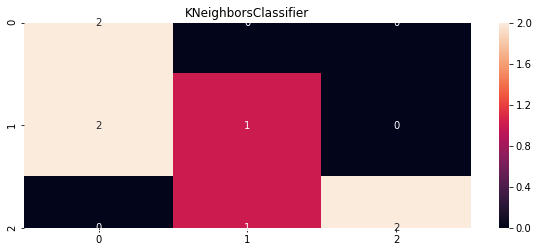

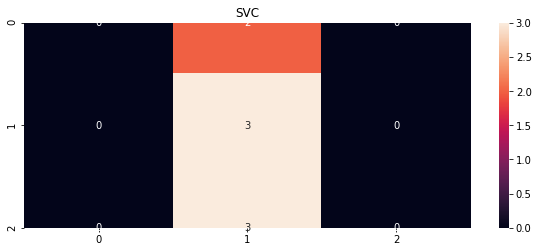

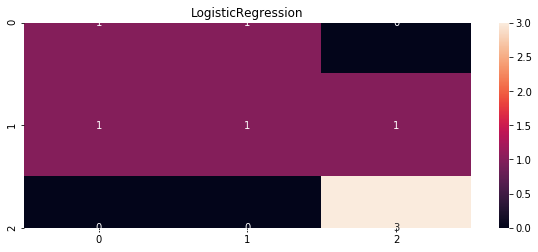

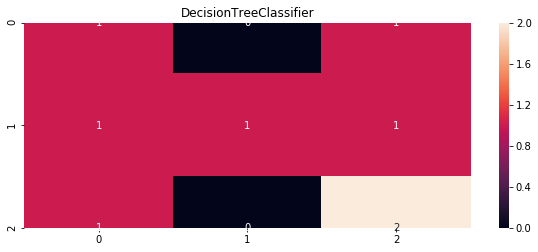

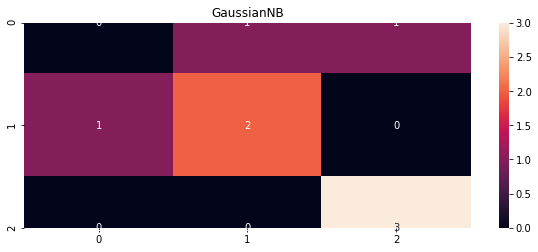

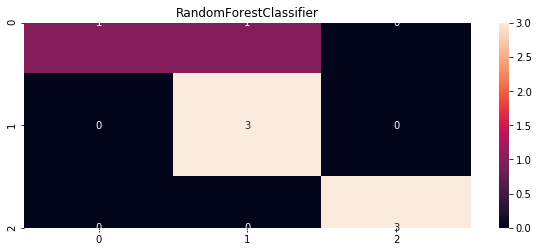

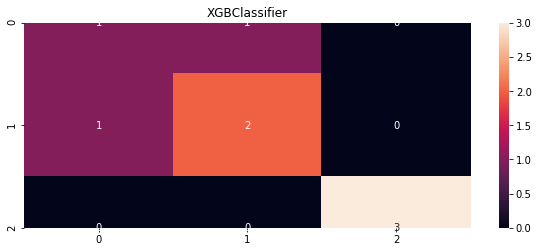

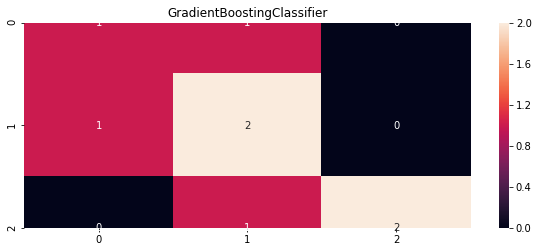

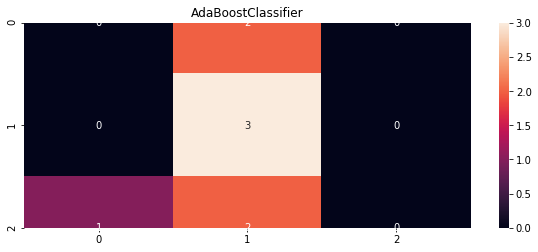

In [111]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    

In [112]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,62.5,47.500000
1,SVC,37.5,48.333333
2,LogisticRegression,62.5,48.333333
3,DecisionTreeClassifier,50.0,43.333333
4,GaussianNB,62.5,45.000000
5,RandomForestClassifier,87.5,35.833333
6,XGBClassifier,75.0,42.500000
7,GradientBoostingClassifier,62.5,37.500000
8,AdaBoostClassifier,37.5,42.500000


In [40]:
#We can see from the table RandomForestClassifier is the best performing Algorithm.
#But the difference in accuracy and CVS scores is very high.
#The model is suffering from under/overfitting condition.

In [ ]:
#Hence we will apply Gridsearchcv to the top performing model and try to reach 90% score.

In [ ]:
#Now lets calculate the random state of the models at which they perform the best.

# Finding the best random_state 

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [114]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   49   which is   0.75
knn 49
max_accuracy_score is at random_state   53   which is   0.75
svc 53
max_accuracy_score is at random_state   74   which is   0.75
lr 74
max_accuracy_score is at random_state   97   which is   0.75
dt 97
max_accuracy_score is at random_state   50   which is   0.875
gnb 50
max_accuracy_score is at random_state   45   which is   0.875
rfc 45
max_accuracy_score is at random_state   70   which is   0.875
xgb 70
max_accuracy_score is at random_state   70   which is   0.75
gbc 70
max_accuracy_score is at random_state   88   which is   0.75
ada 88


# GridsearchCV

# model1->KNeighborsClassifier(random_state=49)=75%

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,stratify=y)
knn=KNeighborsClassifier()

In [117]:
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors':[5,6,8,10,12,14,15]}
gscv=GridSearchCV(knn,param_grid=parameters,cv=3,scoring='accuracy')
gscv.fit(x,y)
gscv.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 5}

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [129]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
knn=KNeighborsClassifier(n_neighbors=5)
cvs=cross_val_score(knn,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(knn,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5166666666666666


array([[4, 5, 0],
       [5, 8, 5],
       [0, 0, 5]], dtype=int64)

# model2->LogisticRegression(random_state=74)=75%

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,stratify=y)
lr=LogisticRegression()

In [125]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2'],'C':[1,2,3,4,5]}
gscv=GridSearchCV(lr,param_grid=parameters,cv=3,scoring='accuracy')
gscv.fit(x,y)
gscv.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 2, 'penalty': 'l1'}

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
lr=LogisticRegression(C=2, penalty='l1')
lr.fit(x,y)
pred=lr.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [128]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
lr=LogisticRegression(C=2, penalty='l1')
cvs=cross_val_score(lr,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(lr,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5944444444444444


array([[7, 5, 1],
       [2, 6, 3],
       [0, 2, 6]], dtype=int64)

# model3->GaussianNB(random_state=50)=87.5%

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,stratify=y)
gnb=GaussianNB()

In [131]:
parameters={'var_smoothing': np.logspace(0,-9, num=100)}
grid_search=GridSearchCV(gnb,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'var_smoothing': 0.1}

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89)
gnb=GaussianNB(var_smoothing= 0.1)
gnb.fit(x,y)
pred_gnb=gnb.predict(x_test)
score=accuracy_score(y_test,pred_gnb)
print('Accuracy=  ',accuracy_score(y_test,pred_gnb))

Accuracy=   0.75


In [134]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gnb=GaussianNB(var_smoothing=0.23101297000831597)
cvs=cross_val_score(gnb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gnb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5416666666666666


array([[6, 7, 0],
       [3, 4, 2],
       [0, 2, 8]], dtype=int64)

# model4->XGBClassifier(random_state=70)=87.5%

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
xgb=XGBClassifier()

In [136]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=gscv.fit(x,y)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.6, 'learning_rate': 0.4, 'max_depth': 3}

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=71)
xgb=XGBClassifier(colsample_bytree=0.6, learning_rate=0.4, max_depth=3)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [138]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.6, learning_rate=0.4, max_depth=3)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.42499999999999993


array([[5, 3, 1],
       [4, 5, 5],
       [0, 5, 4]], dtype=int64)

# model5->SVC(random_state=53)=75%

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53)
svc=SVC()

In [141]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.1,0.5,1,2,3],'kernel':['rbf','poly']}]
            
gscv=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=gscv.fit(x,y)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 3, 'kernel': 'rbf'}

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63)
svc=SVC(kernel='rbf',C=3)
svc.fit(x,y)
pred=svc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [143]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(kernel='rbf',C=3)
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.41666666666666663


array([[3, 4, 0],
       [6, 5, 6],
       [0, 4, 4]], dtype=int64)

# model6->RandomForestClassifier(random_state=45)=87.5%

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
rfc=RandomForestClassifier()

In [145]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 250}

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
rfc=RandomForestClassifier(criterion='gini',min_samples_leaf=1,max_depth=10,n_estimators=250)
rfc.fit(x,y)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [147]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='gini',min_samples_leaf=1,max_depth=10,n_estimators=250)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5083333333333333


array([[5, 5, 0],
       [4, 5, 4],
       [0, 3, 6]], dtype=int64)

# Saving the LogistiRegression model

In [150]:
#From all the model tried above LogistiRegression model cross_val_score is best=59.99%,
#corresponding random_state=49
#Hence saving the final model as LogistiRegression.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
lr=LogisticRegression(C=2, penalty='l1')
lr.fit(x,y)
pred=lr.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [155]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
lr=LogisticRegression(C=2, penalty='l1')
lr.fit(x,y)
cvs=cross_val_score(lr,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(lr,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5944444444444444


array([[7, 5, 1],
       [2, 6, 3],
       [0, 2, 6]], dtype=int64)

In [156]:
from sklearn.externals import joblib
joblib.dump(lr,'project21-lungscancer.obj')

['project21-lungscancer.obj']

In [157]:
model=joblib.load('project21-lungscancer.obj')

In [158]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['target'])
Final_predictions[:5]

,target
0,3
1,1
2,2
3,1
4,2


# Saving final predictions in file.csv format

In [159]:
Final_predictions.to_csv('E:\\final_predictionslungscancer',index=False)

# Conclusion:-